In [23]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
# import data

df = pd.read_csv("D:/Elevate labs internship/AI_ML/Task 8/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
df = df.drop(["CustomerID"],axis=1)

In [35]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


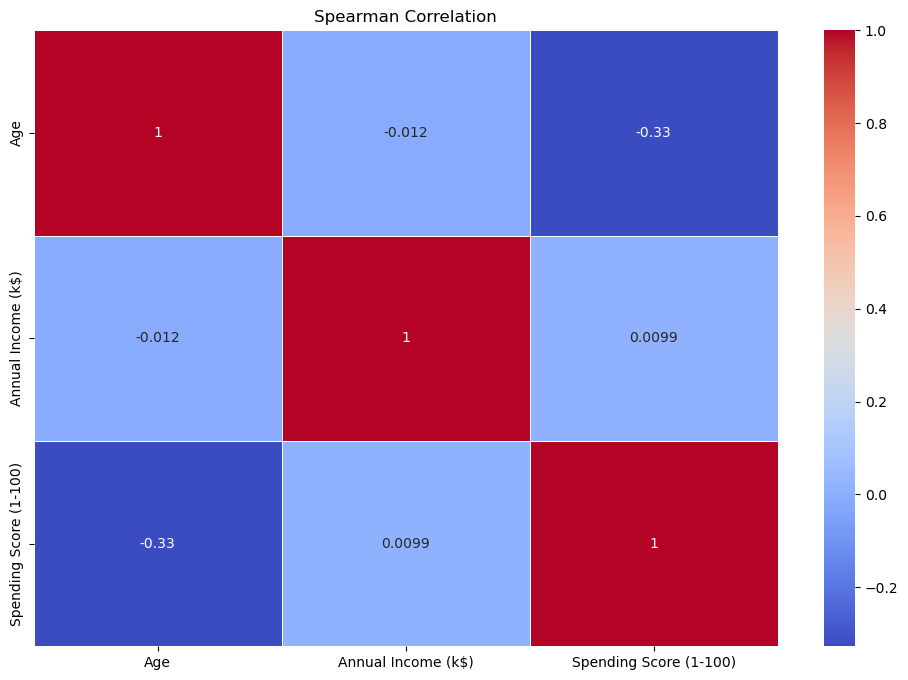

In [37]:
#checking correlation using heat map

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Spearman Correlation")
plt.show()

In [39]:
#Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [43]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled)

       Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    1.128152 -1.424569           -1.738999               -0.434801
1    1.128152 -1.281035           -1.738999                1.195704
2   -0.886405 -1.352802           -1.700830               -1.715913
3   -0.886405 -1.137502           -1.700830                1.040418
4   -0.886405 -0.563369           -1.662660               -0.395980
..        ...       ...                 ...                     ...
195 -0.886405 -0.276302            2.268791                1.118061
196 -0.886405  0.441365            2.497807               -0.861839
197  1.128152 -0.491602            2.497807                0.923953
198  1.128152 -0.491602            2.917671               -1.250054
199  1.128152 -0.635135            2.917671                1.273347

[200 rows x 4 columns]


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memor

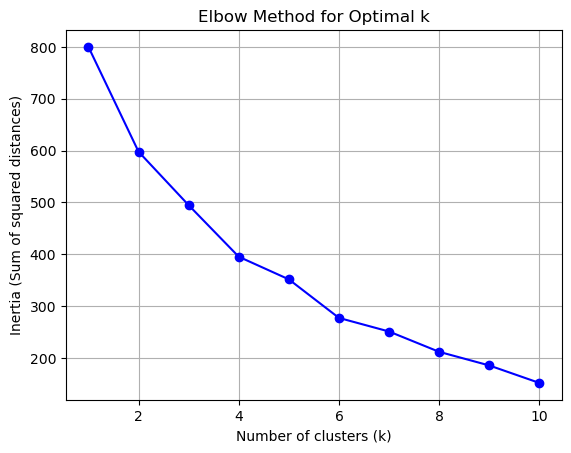

In [49]:
from sklearn.cluster import KMeans
K = range(1, 11)
inertia=[]
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [51]:
# Apply K-means clustering

kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)
df["Cluster"] = df_scaled["Cluster"]
print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        2
1       1   21                  15                      81        2
2       0   20                  16                       6        4
3       0   23                  16                      77        4
4       0   31                  17                      40        4


C:\Users\Aishwarya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


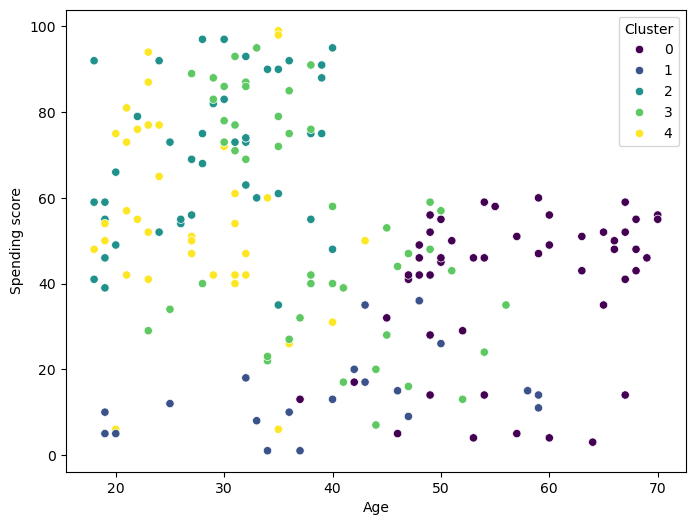

In [55]:
#Clusters based on Age & spending score

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Age"],y=df["Spending Score (1-100)"],hue=df["Cluster"],palette="viridis")
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.show()

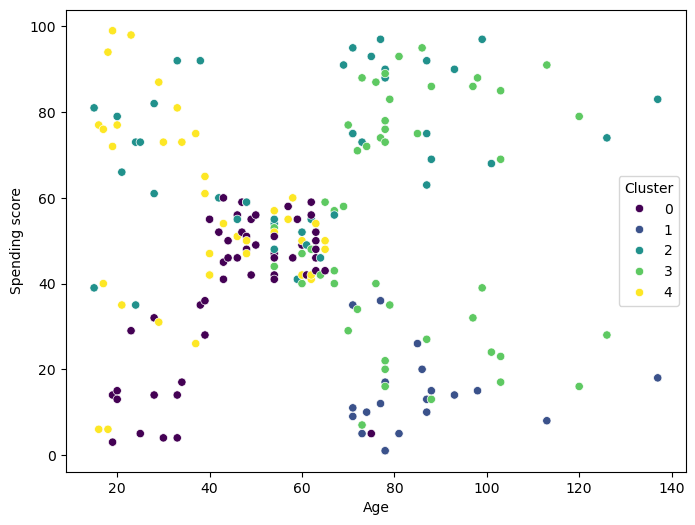

In [57]:
#Clusters based on Income & spending score

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],hue=df["Cluster"],palette="viridis")
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.show()